# `JusTreeAI: Experimental Analysis`

In [249]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### 1. Load Results & Ground Truth Data

In [250]:
# Static file paths.
GROUND_TRUTH_PATH = '../../data/duo-student-finance/cases.json'
RESULTS_PATH = '../../results/duo-student-finance/'

In [251]:
result_files = [
    # DeepSeek-R1 results
    'deepseek-r1:8b-0.8-no-20250226212644.json',
    'deepseek-r1:8b-0.8-yes-20250226211831.json',
    # LLAMA-3.2 results
    'llama3.2:3b-0.8-no-20250129091911.json',
    'llama3.2:3b-0.8-yes-20250226211236.json',
    # OpenThinker results
    'openthinker:7b-0.8-no-20250226222559.json',
    'openthinker:7b-0.8-yes-20250226215759.json',
    # QWEN-2.5 results
    'qwen2.5:1.5b-0.8-no-20250129094820.json',
    'qwen2.5:1.5b-0.8-yes-20250129093907.json'
]

In [252]:
# Load ground truth data.
with open(GROUND_TRUTH_PATH, 'r') as f:
    ground_truth_data = json.load(f)

df_truth = pd.DataFrame(ground_truth_data)

In [253]:
# Load results from each file.
df_results = {}

for file in result_files:
    result_path = os.path.join(RESULTS_PATH, file)
    with open(result_path, 'r') as f:
        result_data = json.load(f)
    df_result = pd.DataFrame(result_data)
    # Pre-process the prediction field.
    if 'prediction' in df_result.columns:
        df_result['prediction'] = df_result['prediction'].replace('Not Eligible', 'NotEligible')
    # Merge the current results with the ground truth data.
    df_merged = df_truth.merge(df_result, left_on='id', right_on='case_id', how='inner')
    # Update the results dictionary.
    model_key = file.rsplit('-', 1)[0]
    model_key = model_key.replace('.json', '')
    df_results[model_key] = df_merged

In [254]:
df_results.keys()

dict_keys(['deepseek-r1:8b-0.8-no', 'deepseek-r1:8b-0.8-yes', 'llama3.2:3b-0.8-no', 'llama3.2:3b-0.8-yes', 'openthinker:7b-0.8-no', 'openthinker:7b-0.8-yes', 'qwen2.5:1.5b-0.8-no', 'qwen2.5:1.5b-0.8-yes'])

### 2. Model Performance Analysis (Accuracy)

We consider the following models:
- Qwen-2.5
- LLaMa-3.2
- DeepSeek-R1
- OpenThinker

(A) `Qwen-2.5`

In [255]:
# MODEL SETUP: Qwen-2.5, params: 1.5B, temperature: 0.8, decision_tree: no.
df_qwen_no = df_results['qwen2.5:1.5b-0.8-no']
correct_predictions = (df_qwen_no['decision'] == df_qwen_no['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_qwen_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['qwen2.5:1.5b-0.8-no']['accuracy'] = accuracy
print(f'Accuracy Ratio for Qwen-2.5 (no decision tree): {accuracy:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for Qwen-2.5 (no decision tree): 0.57
Answered (format): 100 / 100


In [256]:
# MODEL SETUP: Qwen-2.5, params: 1.5B, temperature: 0.8, decision_tree: yes.
df_qwen_yes = df_results['qwen2.5:1.5b-0.8-yes']
correct_predictions = (df_qwen_yes['decision'] == df_qwen_yes['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_qwen_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_qwen_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['qwen2.5:1.5b-0.8-yes']['accuracy'] = accuracy_ratio_qwen_yes
print(f'Accuracy Ratio for Qwen-2.5 (with decision tree): {accuracy_ratio_qwen_yes:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for Qwen-2.5 (with decision tree): 0.51
Answered (format): 100 / 100


(B) `LLaMa-3.2`

In [257]:
# MODEL SETUP: LLaMa-3.2, params: 3.2B, temperature: 0.8, decision_tree: no.
df_llama_no = df_results['llama3.2:3b-0.8-no']
correct_predictions = (df_llama_no['decision'] == df_llama_no['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_llama_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_llama_no = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['llama3.2:3b-0.8-no']['accuracy'] = accuracy_ratio_llama_no
print(f'Accuracy Ratio for LLaMa-3.2 (no decision tree): {accuracy_ratio_llama_no:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for LLaMa-3.2 (no decision tree): 0.53
Answered (format): 94 / 100


In [258]:
# MODEL SETUP: LLaMa-3.2, params: 3.2B, temperature: 0.8, decision_tree: yes.
df_llama_yes = df_results['llama3.2:3b-0.8-yes']
correct_predictions = (df_llama_yes['decision'] == df_llama_yes['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_llama_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_llama_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['llama3.2:3b-0.8-yes']['accuracy'] = accuracy_ratio_llama_yes
print(f'Accuracy Ratio for LLaMa-3.2 (with decision tree): {accuracy_ratio_llama_yes:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for LLaMa-3.2 (with decision tree): 0.67
Answered (format): 99 / 100


(C) `DeepSeek-R1`

In [259]:
# MODEL SETUP: DeepSeek-R1, params: 8B, temperature: 0.8, decision_tree: no.
df_deepseek_no = df_results['deepseek-r1:8b-0.8-no']
correct_predictions = (df_deepseek_no['decision'] == df_deepseek_no['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_deepseek_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_deepseek_no = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['deepseek-r1:8b-0.8-no']['accuracy'] = accuracy_ratio_deepseek_no
print(f'Accuracy Ratio for DeepSeek-R1 (no decision tree): {accuracy_ratio_deepseek_no:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for DeepSeek-R1 (no decision tree): 0.71
Answered (format): 99 / 100


In [260]:
# MODEL SETUP: DeepSeek-R1, params: 8B, temperature: 0.8, decision_tree: yes.
df_deepseek_yes = df_results['deepseek-r1:8b-0.8-yes']
correct_predictions = (df_deepseek_yes['decision'] == df_deepseek_yes['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_qwen_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_deepseek_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['deepseek-r1:8b-0.8-yes']['accuracy'] = accuracy_ratio_deepseek_yes
print(f'Accuracy Ratio for DeepSeek-R1 (with decision tree): {accuracy_ratio_deepseek_yes:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for DeepSeek-R1 (with decision tree): 0.88
Answered (format): 100 / 100


(D) `OpenThinker`

In [261]:
# MODEL SETUP: OpenThinker, params: 7B, temperature: 0.8, decision_tree: no.
df_openthinker_no = df_results['openthinker:7b-0.8-no']
correct_predictions = (df_openthinker_no['decision'] == df_openthinker_no['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_openthinker_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_openthinker_no = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['openthinker:7b-0.8-no']['accuracy'] = accuracy_ratio_openthinker_no
print(f'Accuracy Ratio for OpenThinker (no decision tree): {accuracy_ratio_openthinker_no:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for OpenThinker (no decision tree): 0.25
Answered (format): 29 / 100


In [262]:
# MODEL SETUP: OpenThinker, params: 7B, temperature: 0.8, decision_tree: yes.
df_openthinker_yes = df_results['openthinker:7b-0.8-yes']
correct_predictions = (df_openthinker_yes['decision'] == df_openthinker_yes['prediction']).sum()
total_cases = len(df_truth)
answered = len(df_openthinker_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_openthinker_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['openthinker:7b-0.8-yes']['accuracy'] = accuracy_ratio_openthinker_yes
print(f'Accuracy Ratio for OpenThinker (no decision tree): {accuracy_ratio_openthinker_yes:.2f}')
print(f'Answered (format): {answered} / {total_cases}')

Accuracy Ratio for OpenThinker (no decision tree): 0.57
Answered (format): 61 / 100


**NOTE:** Poor performance caused by many errors from `OpenThinker`. The performance for `OpenThinker` with decision tree is 93% for the correcly processed samples.

### 3. Model Performance Plot

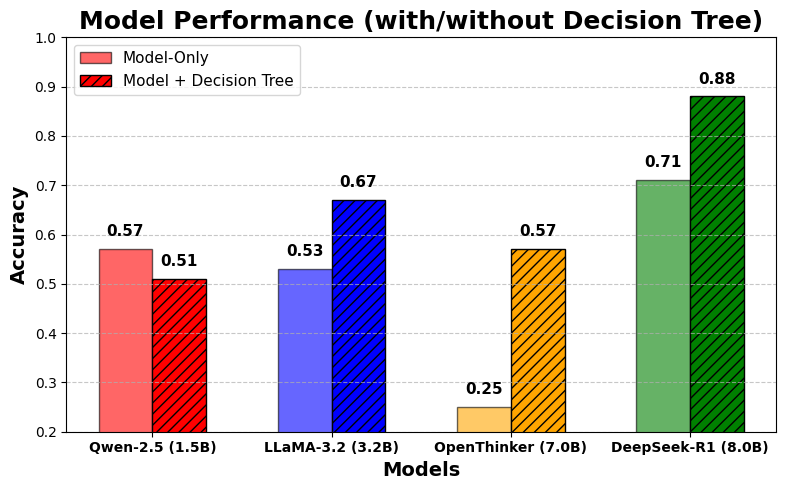

In [263]:
SAVE_PATH = '../../resources/plots/model_performance.png'

# Load the model data.
models = ['Qwen-2.5 (1.5B)', 'LLaMA-3.2 (3.2B)', 'OpenThinker (7.0B)', 'DeepSeek-R1 (8.0B)']
accuracy_model_only = [
    df_results['qwen2.5:1.5b-0.8-no']['accuracy'][0], 
    df_results['llama3.2:3b-0.8-no']['accuracy'][0], 
    df_results['openthinker:7b-0.8-no']['accuracy'][0],
    df_results['deepseek-r1:8b-0.8-no']['accuracy'][0]
]
accuracy_model_tree = [
    df_results['qwen2.5:1.5b-0.8-yes']['accuracy'][0], 
    df_results['llama3.2:3b-0.8-yes']['accuracy'][0], 
    df_results['openthinker:7b-0.8-yes']['accuracy'][0],
    df_results['deepseek-r1:8b-0.8-yes']['accuracy'][0]
]

# Setup bars.
x = np.arange(len(models))
width = 0.3
# Colors: Qwen (red), LLaMA (blue), DeepSeek (green).
colors = ['red', 'blue', 'orange', 'green']
# Create the plot.
fig, ax = plt.subplots(figsize=(8, 5))
# Adjust effects for the bars.
bars1 = ax.bar(
    x - width/2,
    accuracy_model_only,
    width,
    color=colors,
    alpha=0.6,
    label='Model-Only',
    edgecolor='black',
    hatch=''
)
bars2 = ax.bar(
    x + width/2,
    accuracy_model_tree,
    width,
    color=colors,
    alpha=1.0,
    label='Model + Decision Tree',
    edgecolor='black',
    hatch='///'
)
# Label bars.
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )
# Label axes.
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_title('Model Performance (with/without Decision Tree)', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10, fontweight='bold')
# Legend.
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Render the plot and save itsc copy.
plt.ylim(0.2, 1.0)
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=300)
plt.show()

### 4. Model Size Comparison

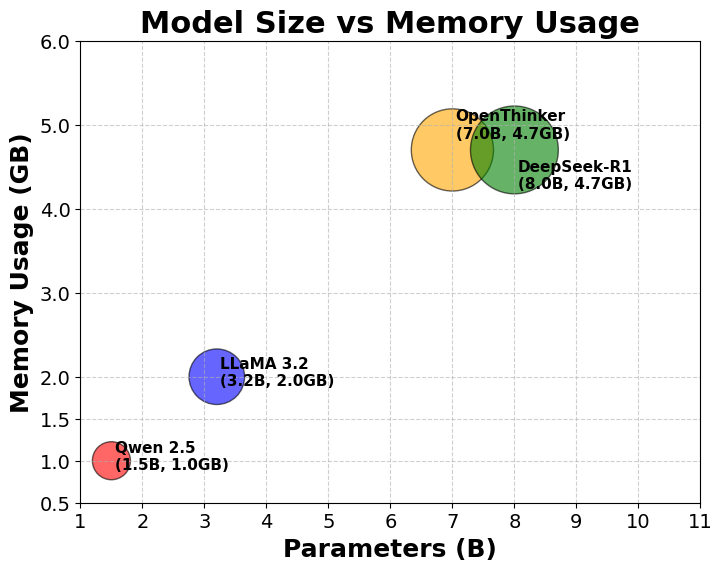

In [264]:
SAVE_PATH = '../../resources/plots/model_size_vs_memory_updated.png'

# Model configs.
models = ['Qwen 2.5', 'LLaMA 3.2', 'OpenThinker', 'DeepSeek-R1']
parameters = [1.5, 3.2, 7.0, 8.0]  # (B)
memory = [1.0, 2.0, 4.7, 4.7]      # (GB)

# Set up the bubble size.
bubble_sizes = [param * 500 for param in parameters]
# Colors.
colors = ['red', 'blue', 'orange', 'green']

# Create the plot.
plt.figure(figsize=(8, 6))
plt.scatter(parameters, memory, s=bubble_sizes, c=colors, alpha=0.6, edgecolors='k')
for i, model in enumerate(models):
    x_offset = 0.05
    y_offset = 0.05 
    if model == "DeepSeek-R1":
        y_offset = -0.3 
    elif model == "OpenThinker":
        y_offset = 0.3   
    plt.text(
        parameters[i] + x_offset,
        memory[i] + y_offset,
        f'{model}\n({parameters[i]}B, {memory[i]}GB)',
        fontsize=11,
        ha='left',
        va='center',
        fontweight='bold'
    )
# Labels etc.
plt.xlabel('Parameters (B)', fontsize=18, fontweight='bold')
plt.ylabel('Memory Usage (GB)', fontsize=18, fontweight='bold')
plt.title('Model Size vs Memory Usage', fontsize=22, fontweight='bold')
# Axis adjustments.
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], fontsize=14)
plt.yticks([0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0], fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot as PNG.
plt.savefig(SAVE_PATH, dpi=300)
plt.show()

### 5. Execution Time Comparison

**NOTE:** The plots below are based on the time measurements facilitated during the experiments.

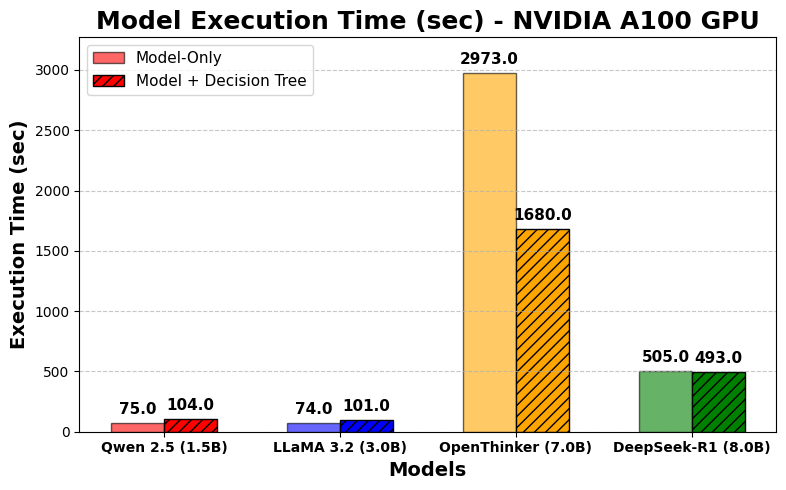

In [265]:
SAVE_PATH = '../../resources/plots/model_inference_time.png'

# Model configs (data extracted from: resources/other/inference-time-logs.txt).
models = ['Qwen 2.5 (1.5B)', 'LLaMA 3.2 (3.0B)', 'OpenThinker (7.0B)', 'DeepSeek-R1 (8.0B)']
runtime_model_tree = [104, 101, 1680, 493]
runtime_model_only = [75, 74, 2973, 505]  

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(
    x - width/2,
    runtime_model_only,
    width,
    color=colors,
    alpha=0.6,
    label='Model-Only',
    edgecolor='black'
)
bars2 = ax.bar(
    x + width/2,
    runtime_model_tree,
    width,
    color=colors,
    alpha=1.0,
    label='Model + Decision Tree',
    edgecolor='black',
    hatch='///'
)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 50, 
            f'{float(height)}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )

ax.set_ylabel('Execution Time (sec)', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_title('Model Execution Time (sec) - NVIDIA A100 GPU', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(runtime_model_only + runtime_model_tree) * 1.1)
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=300)
plt.show()

### 6. Token Size Comparison for Thoughts

In [266]:
thoughts_openthinker_no = df_results['openthinker:7b-0.8-no']['thought_chain']
thoughts_openthinker_yes = df_results['openthinker:7b-0.8-yes']['thought_chain']
thoughts_deepseek_no = df_results['deepseek-r1:8b-0.8-no']['thought_chain']
thoughts_deepseek_yes = df_results['deepseek-r1:8b-0.8-yes']['thought_chain']

# Basic tokenization using split()
def tokenize_and_count(thoughts):
    return [len(str(thought).split()) for thought in thoughts]  

# Compute tokenized thought lengths
thought_lengths = {
    "DeepSeek-R1 (No Tree)": tokenize_and_count(thoughts_deepseek_no),
    "DeepSeek-R1 (With Tree)": tokenize_and_count(thoughts_deepseek_yes),
    "OpenThinker (No Tree)": tokenize_and_count(thoughts_openthinker_no),
    "OpenThinker (With Tree)": tokenize_and_count(thoughts_openthinker_yes),
}

# Convert to DataFrame
df_lengths = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in thought_lengths.items()]))


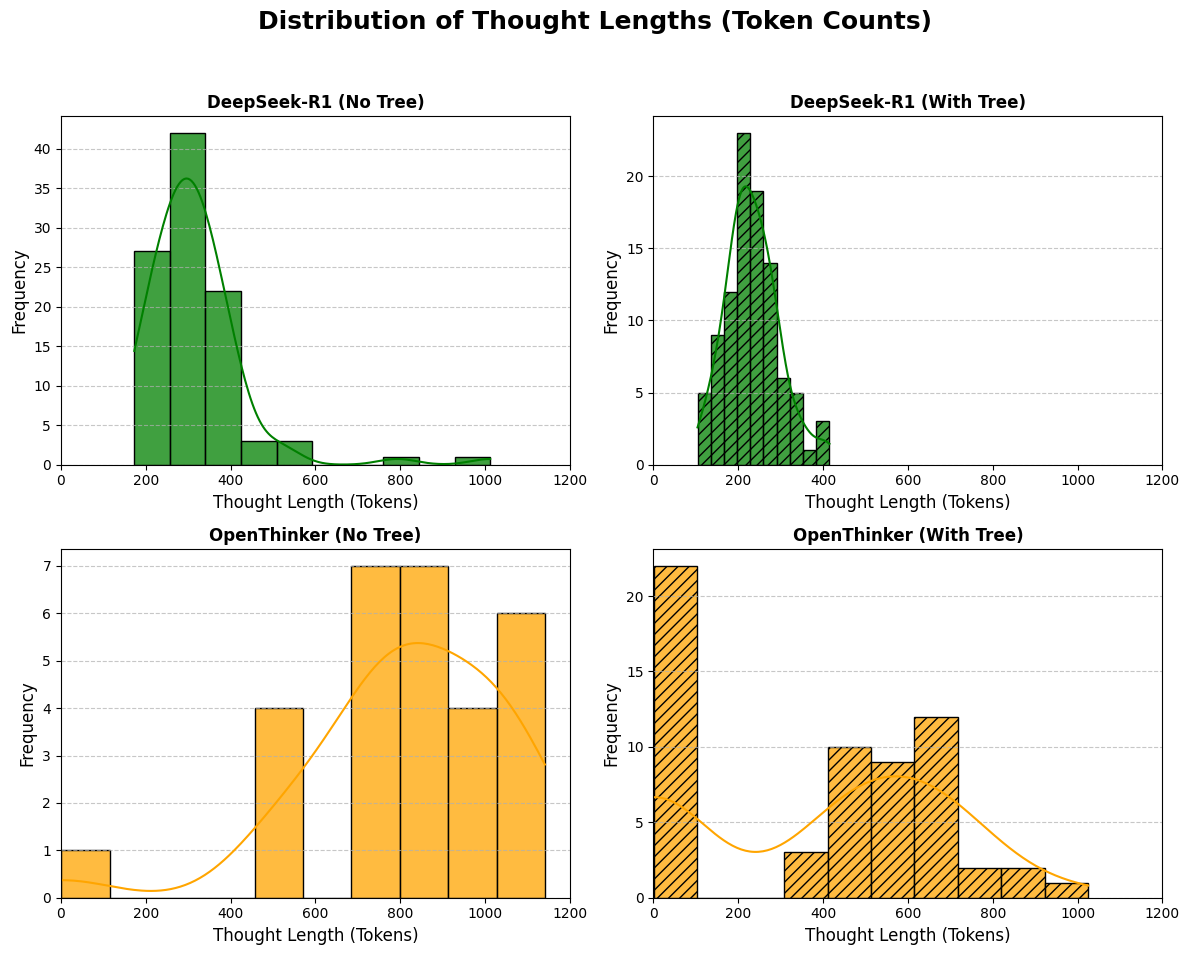

In [267]:
SAVE_PATH = '../../resources/plots/thought_distribution.png'
colors = ['green', 'green', 'orange', 'orange'] 
hatches = ['', '///', '', '///']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Thought Lengths (Token Counts)", fontsize=18, fontweight='bold')

for i, (model, ax) in enumerate(zip(thought_lengths.keys(), axes.flatten())):
    sns.histplot(
        thought_lengths[model], 
        bins=10, 
        kde=True, 
        ax=ax, 
        color=colors[i], 
        edgecolor='black', 
        alpha=0.75
    )
    for patch in ax.patches:
        patch.set_hatch(hatches[i])
    ax.set_title(model, fontsize=12, fontweight='bold')
    ax.set_xlabel("Thought Length (Tokens)", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlim(0, 1200)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(SAVE_PATH, dpi=300)
plt.show()

/var/folders/x2/b0mdrk5s6v117qz9wtn8hc340000gn/T/ipykernel_70100/2881139478.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_thought_lengths.keys(), rotation=20, fontsize=12)


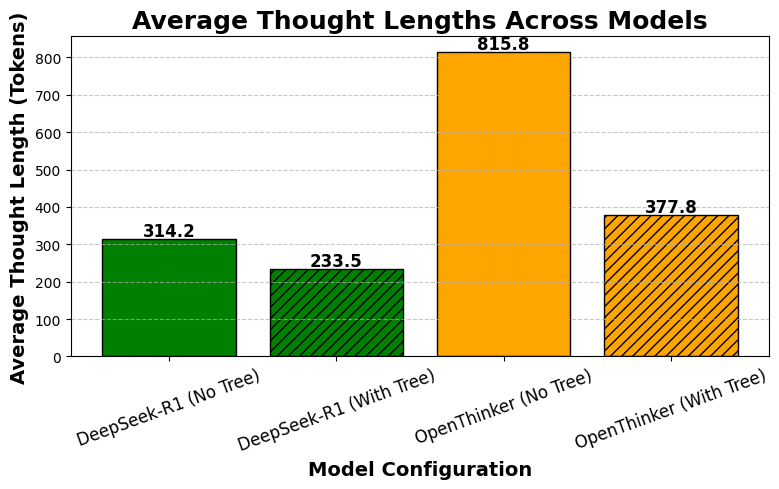

In [268]:
# Compute average thought lengths.
avg_thought_lengths = {model: np.mean(lengths) for model, lengths in thought_lengths.items() if lengths}

SAVE_PATH = '../../resources/plots/average_thought_lengths.png'

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(
    avg_thought_lengths.keys(),
    avg_thought_lengths.values(),
    color=colors,
    edgecolor='black'
)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.set_title("Average Thought Lengths Across Models", fontsize=18, fontweight='bold')
ax.set_ylabel("Average Thought Length (Tokens)", fontsize=14, fontweight='bold')
ax.set_xlabel("Model Configuration", fontsize=14, fontweight='bold')
ax.set_xticklabels(avg_thought_lengths.keys(), rotation=20, fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 7.5,
        f"{height:.1f}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=300)
plt.show()